# More Multivariate Normal Things


## What is not Multivariate Regression

---

Rather than $\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1}, \Sigma_{n\times n} = \sigma^2I_{n\times n})$

- where we used a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior fo  $\boldsymbol \beta_{p\times 1}$
- and a univariate prior for precision $\phi = \sigma^{-2}$ or variance $\sigma^2$ such as $\text{gamma}(a,b)$ or $\mathcal{IG}(a,b)$

what about $\underset{m\times 1}{\mathbf{y}_i} \overset{iid}{\sim} \mathcal{MVN}(\boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i},  \Sigma_{m\times m} \neq \sigma^2I_{n\times n})$ which models

- $\underset{n\times m}{\mathbf{y}}$ with
    - $E[\underset{n\times p}{\mathbf{y}}| \underset{n\times m}{\mathbf{X}} ] = \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}$
    - $COV[\underset{\text{both } m\times 1}{\mathbf{y}_i, \mathbf{y}_j}] = \Sigma_{m\times m} $


The **likelihood** is
   
$\begin{align*}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m})
& ={} \prod_{i=1}^n (2\pi )^{-m/2}\det(\Sigma_{m\times m})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top \Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \propto{} \det({ {\Sigma }})^{-n/2}\,\exp \left(\sum_{i=1}^n -{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top\Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \quad\; \text{The trace of a square matrix is the sum of its diagonal elements}\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \left(-\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} (\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top\big)\right)\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \overset{\Large \text{trace}(ABC) \; = \;  \text{trace}(CAB)}{\left( -\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top(\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} \big)\right)}\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big(\underset{\text{both } m\times m}{\boldsymbol \epsilon^\top \boldsymbol \epsilon} \underset{m\times m}{\Sigma^{-1}}\big)\right)\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
& \propto {}
\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}}, \nu = n-m-1 \right)
\end{align*}$

an [Inverse-Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution when viewed as a function of $\Sigma$.


## Inverse-Wishart Distributions

---

Thus for an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n_0 \right)$
 prior for covariance $\Sigma_{m\times m}$ the **full conditional**

$\begin{align*}
f(\Sigma_{m\times m} | \underset{n\times m}{\mathbf{y}},\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}) &\propto{}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m}) \times p(\Sigma)\\
&\propto{}
\det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right) \times
\det({\Sigma})^{-(n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\Big( \big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} + {\underset{m\times m}{\boldsymbol \Psi_0}} \big) \underset{m\times m}{\Sigma^{-1}} \Big) \right)
\end{align*}$

is also seen to be an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}} + \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n+n_0 \right)$

---

## Conditional MVN distributions (are MVN distributions)

For **MVN** $f( \mathbf{\tilde x} = (\mathbf x,\mathbf x^*) )$

$$p\left(\mathbf{\tilde x}\;\Bigg|\;\boldsymbol \mu = \left[\begin{array}{c} \underset{q\times1}{\boldsymbol \mu_{\mathbf{ x}}}\\ \underset{r\times1}{\boldsymbol \mu_{\mathbf{ x^*}}} \end{array} \right], \boldsymbol \Sigma = \left[\begin{array}{cc}  \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x}}} &  \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}\\  \underset{r \times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} =  {\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}^T} &  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x*}}}\end{array}\right] \right) = {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{q+r}|{\boldsymbol {\Sigma }}|}}}$$

the **conditional distribution** $f(\mathbf x^* | \mathbf x)$ of [is also **MVN**](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions)

$$\mathbf{x^*} | \mathbf x, \boldsymbol \mu, \boldsymbol \Sigma \sim  \mathcal{MVN}\left( {\bar {\boldsymbol {\mu }}}= \underset{q\times1}{{\boldsymbol {\mu }}_{\mathbf{x^*}}}+ \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma}}^{-1}_{\mathbf{x}}} \underset{r\times1}{\left(\mathbf {x} -{\boldsymbol {\mu }}_{\mathbf{x}}\right)},  {\overline {\boldsymbol {\Sigma }}}= \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}}}- \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x}}^{-1}} \underset{r\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}  \right)$$

though if ${\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} = \mathbf{0}_{m \times n}$ then $\mathbf{x^*}$ is independent of $\mathbf{x}$



## What is Multivariate Regression?

For

- $y_{ik}$ the $k^{th}$ element of observation vector $\textbf{y}_{i}$
- $\textbf{y}_{i,-k}$ the vector of all other elements
- $\Sigma_{k,-k}$ the $k^{th}$ row without $\sigma_k^2 = \Sigma_{kk}$ and $\Sigma_{-k,k}$ the same for columns
- $\Sigma_{-k,-k}$ the $\Sigma$ matrix without the $k^{th}$ row and column
- $\boldsymbol \beta_k$ the vector corresponding to the $k^{th}$ row if $\boldsymbol \beta$
- $\boldsymbol \beta_{-k}$ the $\boldsymbol \beta$ without the $k^{th}$ row

$\begin{align*}
p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \Sigma_{k,-k}\Sigma_{-k,-k}^{-1} \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right), \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})) \\
&={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right)^\top \Sigma_{-k,-k}^{-1}\Sigma_{-k,k}, \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})
\end{align*}$

Thus for $\underset{n\times 1}{\mathbf{y}_k}$ the $k^{th}$ column of $\underset{n\times m)}{\mathbf{y}}$ and $\underset{n\times (m-1)}{\mathbf{y}_{-k}}$ the matrix $\underset{n\times m}{\mathbf{y}}$ without its $k^{th}$ column

$\begin{align*}
\prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &\propto{} \exp\left(-\frac{\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)^{\top}\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)}{2(\sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})} \right)
\end{align*}$

which is a **linear regression model** with an adjustment for the **residuals** of the other $k-1$ regression models based on the covariance structure of the outcomes $\Sigma$




While the outcomes are a little more complex than usual, when viewed as a function of the $k^{th}$ column $\underset{p\times 1}{\boldsymbol{\beta}_k}$ of $\boldsymbol{\beta}_{p\times m}$ this is just a **standard linear regression model**

Which suggests a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior for each $\underset{p\times 1}{\boldsymbol{\beta}_k}$

$\begin{align*}
f(\boldsymbol{\beta}_{k} | \underset{n\times m}{\mathbf{y}}, \underset{n\times p}{\mathbf{X}}, \underset{n\times (m-1)}{\boldsymbol \beta_{-k}}, \Sigma_{m\times m})
& \propto{} \prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) \times p(\boldsymbol{\beta}_{k}) \\
& \propto{} \exp \left( -\frac{1}{2} (\underset{n\times 1}{\mathbf{\tilde y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})^\top \tilde \sigma_{k}^{-2}(\underset{n\times 1}{\mathbf{\tilde  y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})\right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right) \\
& \propto{} \mathcal{MVN}\left( COV \times \big(\Sigma_\beta^{-1} \beta_0 + \sigma_{k}^{-2}\mathbf{X}^\top \mathbf{\tilde y}_k\big), COV = \big(\Sigma_\beta^{-1} + \tilde \sigma_{k}^{-2}\mathbf{X}^\top\mathbf{X}\big)^{-1}  \right)
\end{align*}$




## More on Inverse-Wishart Distributions


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
p = 2  # dimension
# scale matrix
Psi = np.eye(dimension)  # 2x2 identity
try:
    nu = 101 # nu must be greater than p-1
    # nu is the "degrees of freedom"
    print(stats.invwishart(df=nu, scale=Psi).rvs())

except ValueError as error:
    print(error)

print("|Sigma|^{nu+p+1} with nu =", nu," > p-1 =",p-1,"?")

[[ 0.01074686 -0.00134177]
 [-0.00134177  0.00861041]]
|Sigma|^{nu+p+1} with nu = 101  > p-1 = 1 ?



$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ is defined for } \nu>p+1$$


In [ ]:
                       # df=p-1 obviously won't work...
denom = 1              # df=p+1 won't work...
myIWD = stats.invwishart(df=p+1+denom, scale=Psi*[1,denom][denom>0])
myIWD.rvs(size=10000).mean(axis=0)

array([[ 1.07176305, -0.03084237],
       [-0.03084237,  1.03532354]])

## The LKJ (not Inverse-Wishart) prior

The **covariance matrix** $ \Sigma_{p \times p} = {D R D} = {D LL^\top D}$ for
- ${D} = \operatorname{diag}(\boldsymbol \sigma)$ the diagonal matrix of **standard deviations**
- ${R}$ the **correlation matrix** with all diagonal values equal to $1$
- ${L}$ the lower diagonal of the **Cholesky decomposition** of ${R}$

The **LKJ (Lewandowski-Kurowicka-Joe) prior** is [simpler to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html)  than the **Inverse-Wishart**

$$\require{cancel}
\begin{align*}
p( {R}) &\propto {}\det({R})^{\eta -1}\\
f^{-1}( {L}) &={} {L} {L}^\top = R\\
p( {L}) &\propto{} \det({LL^\top})^{\eta -1} \det(J) = \underbrace{\left(\prod_{k=1}^p  {L}_{kk}\right)^{\eta -1}}_{\det({L})^{\eta -1}}\underbrace{\left(\prod_{k=1}^p  {L}_{kk}^\top\right)^{\eta -1}}_{\det({L^\top})^{\eta -1}} \underbrace{\left(\prod_{k=1}^p 2 {L}_{kk}^{p+1-k}\right)}_{\det(J)} = 2 \prod_{k=1}^p  {L}_{kk}^{p+1-k + 2(\eta-1)}\\
J &={} \frac{d f^{-1}( {L})}{d  {L}} \quad J_{ij} = \frac{d {r}_i}{d {l}_j}\\
\end{align*}$$

since (1) the determinant of a product is the product of the determinants, (2) the determinant of a triangular matrix is the product of the diagonals, and (3) the Jacobian matrix $J$ is also triangular as given below.



$\begin{align*}
LL^T &={}
\begin{array}{|c|c|c|}
\hline
l_1 = L_{11} & & \\\hline
l_2 = L_{21} & l_4 = L_{22} &\\\hline
l_3 = L_{31} & l_5 = L_{32} & l_6 = L_{33} \\\hline
\end{array} \times
\begin{array}{|c|c|c|}
\hline
L_{11} & L_{21} & L_{31} \\\hline
 & L_{22} &  L_{32} \\\hline
 & & L_{33} \\\hline
\end{array}\\
&={}
\begin{array}{|l|l|l|}
\hline
r_1 = R_{11} = L_{11}^2 & r_2 & r_3 \\\hline
r_2 = R_{12} = L_{21}L_{11} & r_4 = R_{22} = L_{12}^2 + L_{22}^2 & r_5\\\hline
r_3 = R_{13} = L_{31}L_{11} & r_5 = R_{32} = L_{31}L_{21} + L_{32}L_{22} & r_6 = L_{31}^2 + L_{32}^2 + L_{33}^2 \\\hline
\end{array}\\
J &={}
\begin{array}{|l|l|l|l|l|l|}
\hline
\frac{dr_1}{dl_1}=2L_{11}&\frac{dr_1}{dl_2}=0&\frac{dr_1}{dl_3}=0&\frac{dr_1}{dl_4}=0&\frac{dr_1}{dl_5}=0&\frac{dr_1}{dl_6}=0\\\hline
\frac{dr_2}{dl_1}&\frac{dr_2}{dl_2} = L_{11} &\frac{dr_2}{dl_3}=0&\frac{dr_2}{dl_4}=0&\frac{dr_2}{dl_5}=0&\frac{dr_2}{dl_6}=0\\\hline
\frac{dr_3}{dl_1}&\frac{dr_3}{dl_2}&\frac{dr_3}{dl_3} = L_{11} &\frac{dr_3}{dl_4}=0&\frac{dr_3}{dl_5}=0&\frac{dr_3}{dl_6}=0\\\hline
\frac{dr_4}{dl_1}&\frac{dr_4}{dl_2}&\frac{dr_4}{dl_3}&\frac{dr_4}{dl_4}=2L_{22}&\frac{dr_4}{dl_5}=0&\frac{dr_4}{dl_6}=0\\\hline
\frac{dr_5}{dl_1}&\frac{dr_5}{dl_2}&\frac{dr_5}{dl_3}&\frac{dr_5}{dl_4}&\frac{dr_5}{dl_5}=L_{22}&\frac{dr_5}{dl_6}=0\\\hline
\frac{dr_6}{dl_1}&\frac{dr_6}{dl_2}&\frac{dr_6}{dl_3}&\frac{dr_6}{dl_4}&\frac{dr_6}{dl_5}&\frac{dr_6}{dl_6}=2L_{33}\\\hline
\end{array}
\end{align*}
$

### More details

$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1}$ with $\eta=1$ is $p(\mathbf {R}) \propto 1$ which specifies a uniform distribution on **correlation matrices**. This is nonetheless a **proper prior** and so results in a **proper posterior** when used with the **multivariate regression** specification above.

> $p(\boldsymbol \Sigma)\propto 1$ is an **improper prior** and so results in an **improper posterior** when used with the **multivariate regression** specification above until $n$ results in a sufficiently large $\nu$.
>
> - Intuitively, the difference here is that each element of $\Sigma$ is unbounded while each element of $R$ is bounded.

The absolute **determinant** is the product of the **singular values**
- The **determinant** is positive for **positive definite matrices** such as $R$
- For **correlation matrices** the **determinant** is largest when all **singular values** (which sum to $p$) are equal to $1$ which happens when all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors **correlation matrices** with
smaller magnitudes of component correlations.

Univariate priors for $\sigma_k = \boldsymbol \sigma_k$ are needed to complete the full specification $p(\boldsymbol \Sigma) \propto p(\boldsymbol \sigma)p(\mathbf {R})$.

> This is the first time we leverage the proportionality starting immediately with the prior (before even considering the posterior).








In [ ]:
import pymc as pm

with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2),
                                 compute_corr=False)
packed_L.eval()

array([ 1.31223496, -0.08561639,  2.02967541])

In [ ]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[ 1.72196058, -0.11234882],
       [-0.11234882,  4.12691244]])

In [ ]:
L.eval()

array([[ 1.31223496,  0.        ],
       [-0.08561639,  2.02967541]])

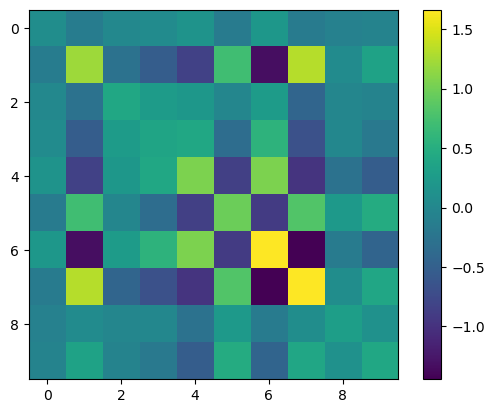

In [ ]:
p=10
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
n=100
x=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
plt.imshow(a_cov)
plt.colorbar();

In [ ]:
with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=0, cov=np.eye(p), shape=p)
    y = pm.MvNormal('y', mu=mu, chol=L,  #cov=Sigma
                    shape=(n,1), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


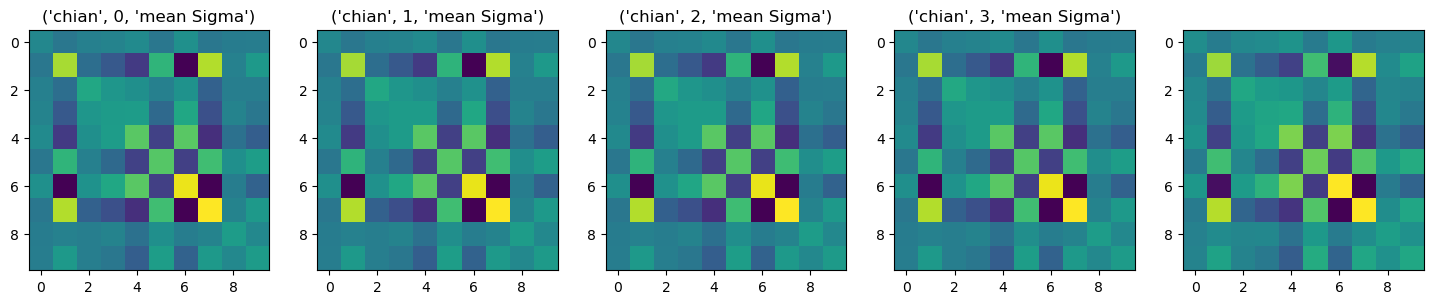

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

## MVN computation

Using the **Cholesky decomposition** is desirable because it provides efficient computation **MVN** evaluations $(2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}( {y} -{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}({y} - {X\beta})\right)$ since

- $\det({\boldsymbol {\Sigma }}) = \det({LL^T}) = \det({L}) \det({L^T}) = \prod_{k=1}^p  {L}_{kk}^2$

as already seen above, but now also

- $(\textbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\textbf{y}-\boldsymbol\mu) = \boldsymbol \epsilon^\top  {L}^{-\top} {L}^{-1} \boldsymbol \epsilon = \underbrace{( {L}^{-1} \boldsymbol \epsilon)^\top( {L}^{-1} \boldsymbol \epsilon) =  \textbf{x}^\top \textbf{x}}_{\Large \Longrightarrow \; {L} \textbf{x}\; =\; \boldsymbol \epsilon} $

where $\textbf{x}$ can be efficiently solved for based on **lower triangular backwards substitution** and hence $\textbf{x}^\top \textbf{x}$ directly computed without requiring the inversion $\Sigma^{-1}$


## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics





Output()

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]    4.223  0.597   3.168    5.349      0.018    0.013    1171.0   
betas[1]   -0.184  0.309  -0.754    0.393      0.007    0.006    2041.0   
betas[2]    0.195  0.278  -0.302    0.733      0.005    0.005    3216.0   
betas[3]    0.610  0.307   0.063    1.214      0.007    0.006    1806.0   
betas[4]    0.719  0.348   0.066    1.388      0.008    0.006    1995.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[242]  0.701  0.172   0.384    0.976      0.004    0.002    2416.0   
theta[243]  0.996  0.006   0.987    1.000      0.000    0.000    1516.0   
theta[244]  0.994  0.009   0.982    1.000      0.000    0.000    1221.0   
theta[245]  0.138  0.097   0.006    0.319      0.002    0.002    1999.0   
theta[246]  0.981  0.015   0.955    0.999      0.000    0.000    2100.0   

            ess_tail  r_hat  
betas[0]      1185.0    1.0  
betas[1]      1433.0    1.0  
betas[2] 

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (263) in plot_posterior, generating only 40 plots
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (526) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\n0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1'}>,
        <Axes: title={'center': 'betas\n0, 2'}>,
        <Axes: title={'center': 'betas\n0, 3'}>],
       [<Axes: title={'center': 'betas\n0, 4'}>,
        <Axes: title={'center': 'betas\n0, 5'}>,
        <Axes: title={'center': 'betas\n0, 6'}>,
        <Axes: title={'center': 'betas\n0, 7'}>],
       [<Axes: title={'center': 'betas\n0, 8'}>,
        <Axes: title={'center': 'betas\n0, 9'}>,
        <Axes: title={'center': 'betas\n0, 10'}>,
        <Axes: title={'center': 'betas\n0, 11'}>],
       [<Axes: title={'center': 'betas\n0, 12'}>,
        <Axes: title={'center': 'betas\n0, 13'}>,
        <Axes: title={'center': 'betas\n0, 14'}>,
        <Axes: title={'center': 'betas\n0, 15'}>],
       [<Axes: title={'center': 'betas\n1, 0'}>,
        <Axes: title={'center': 'betas\n1, 1'}>,
        <Axes: title={'center': 'betas\n1, 2'}>,
        <Axes: title={'center': 'betas\n1, 3'}>],
       [<

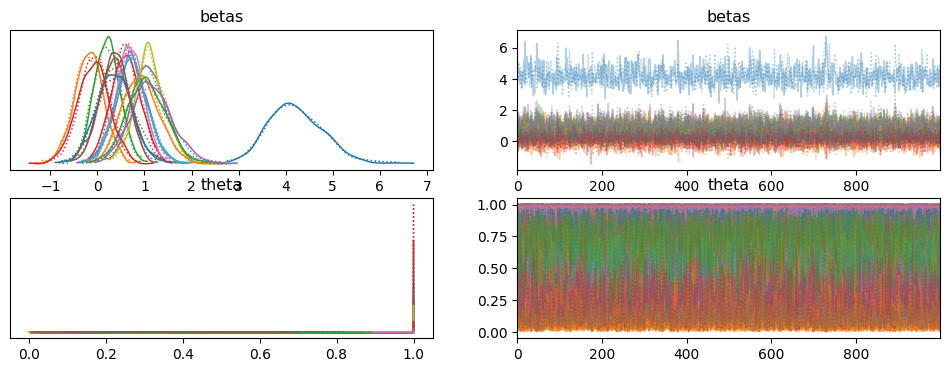

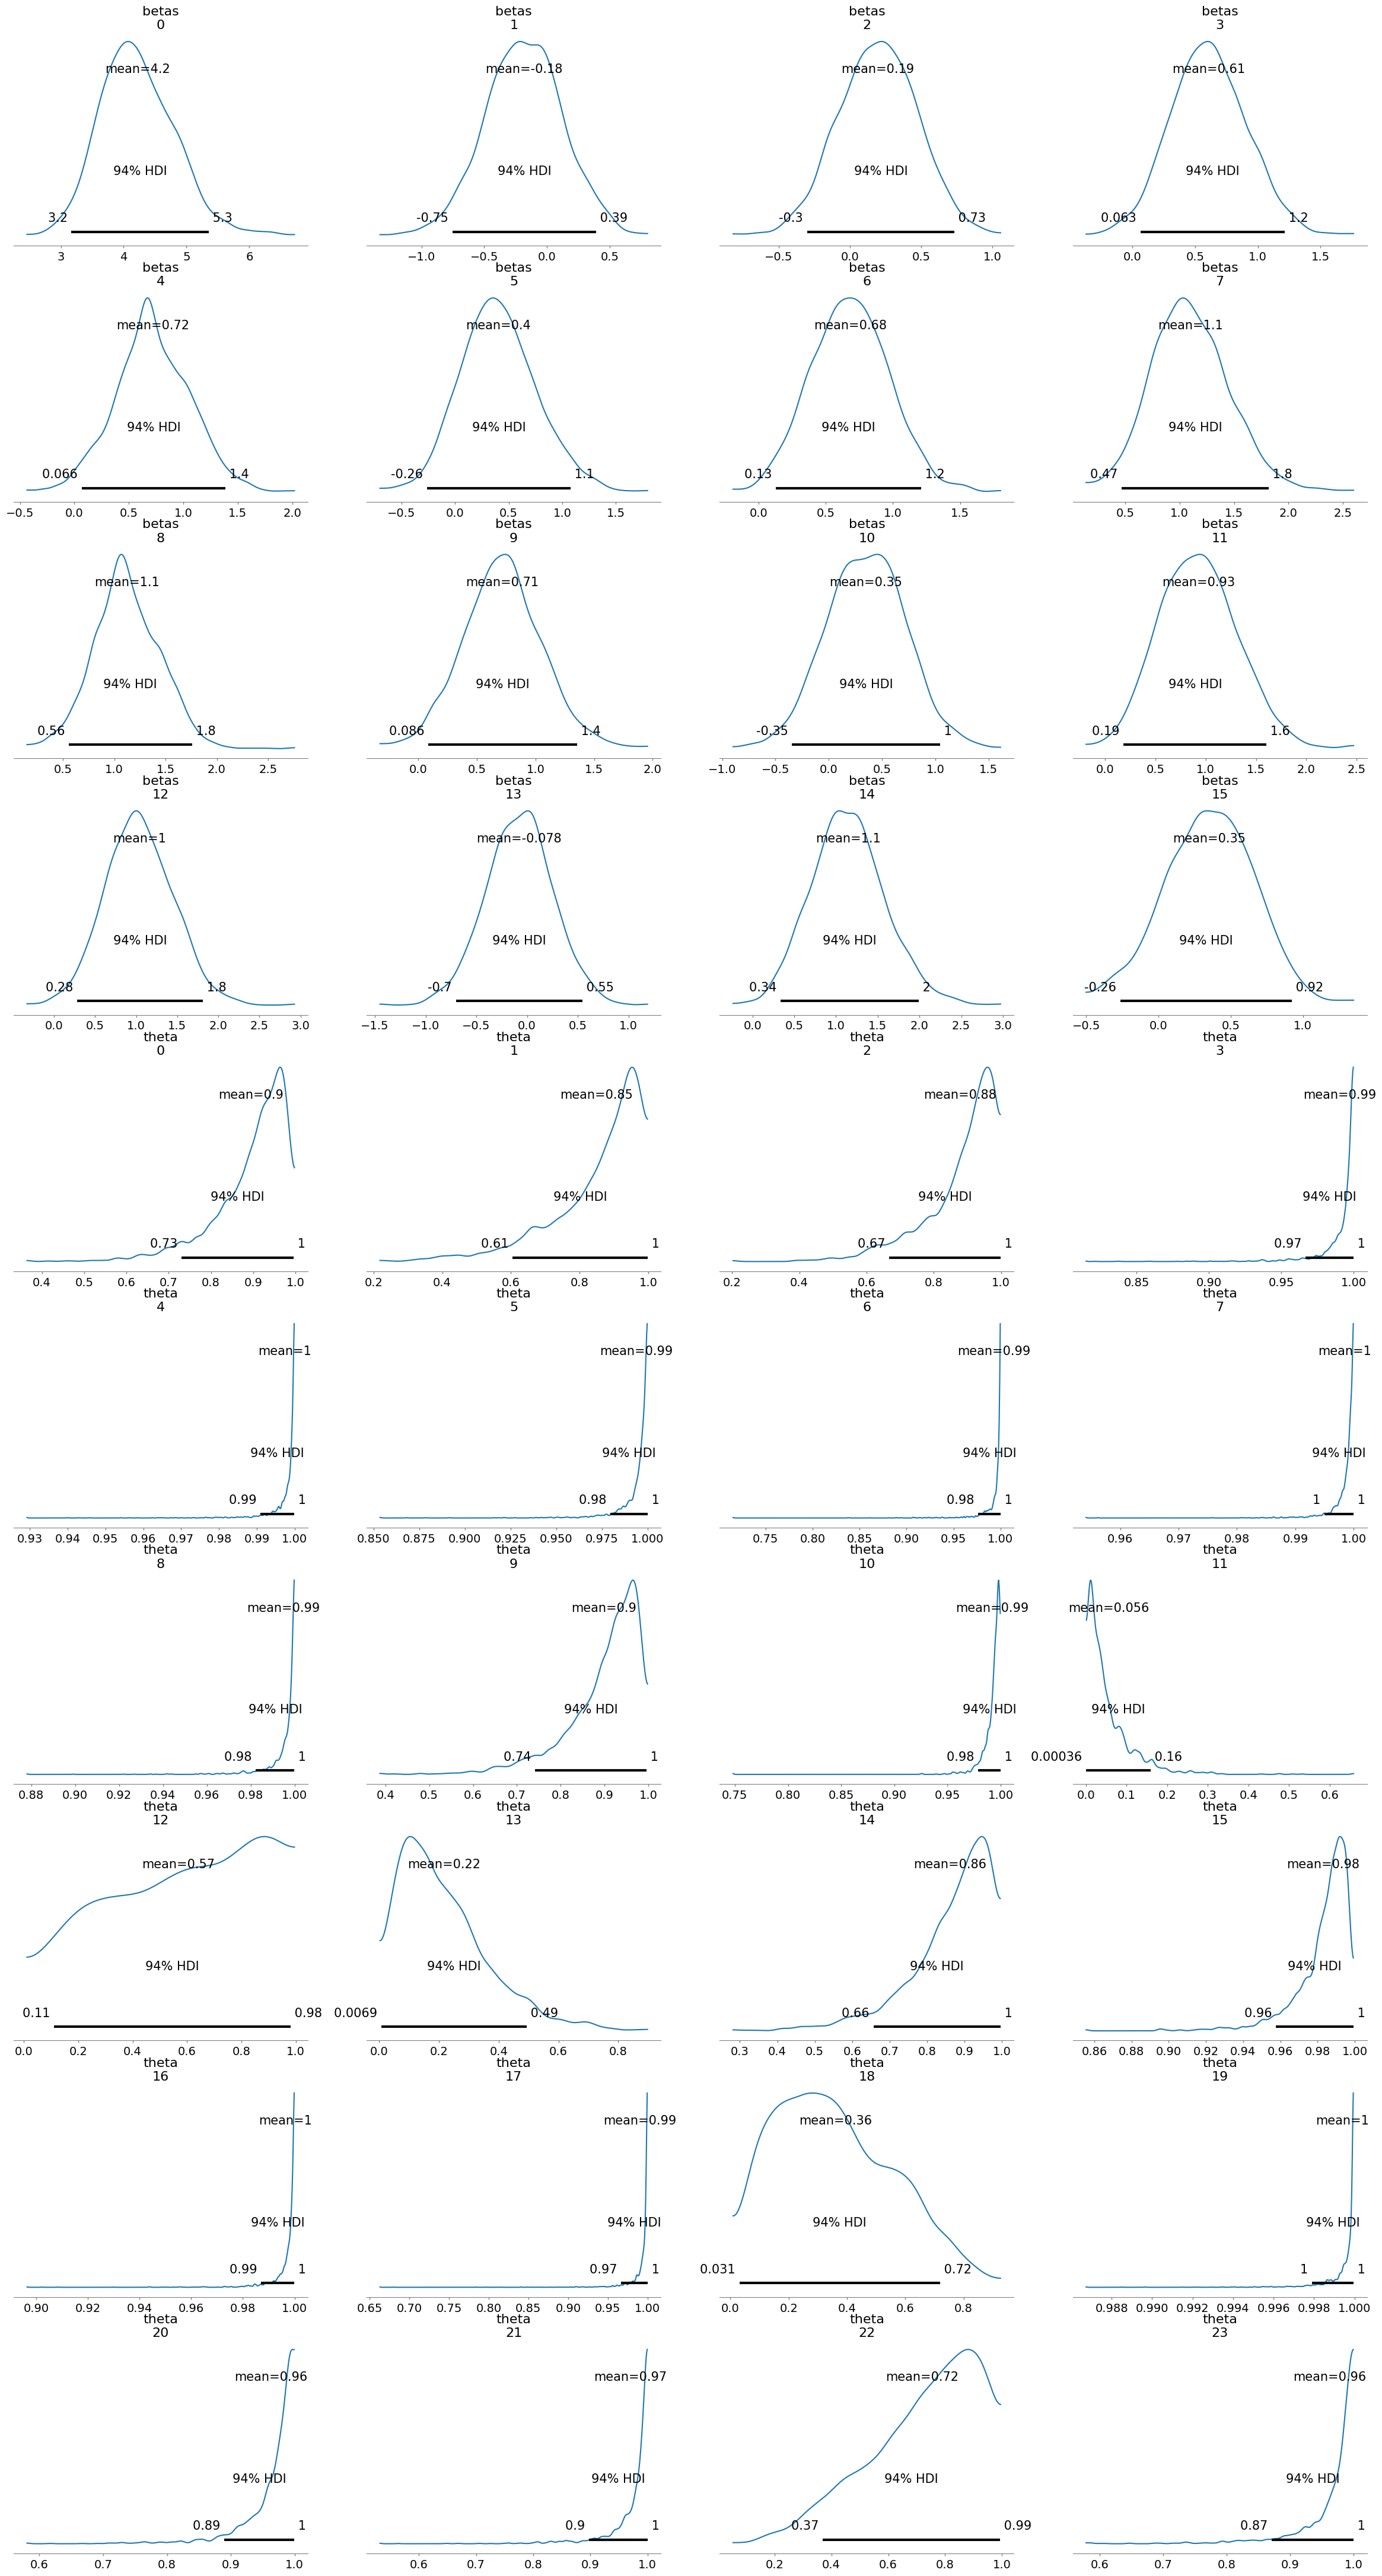

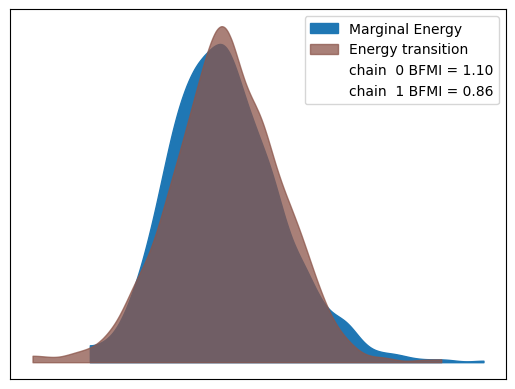

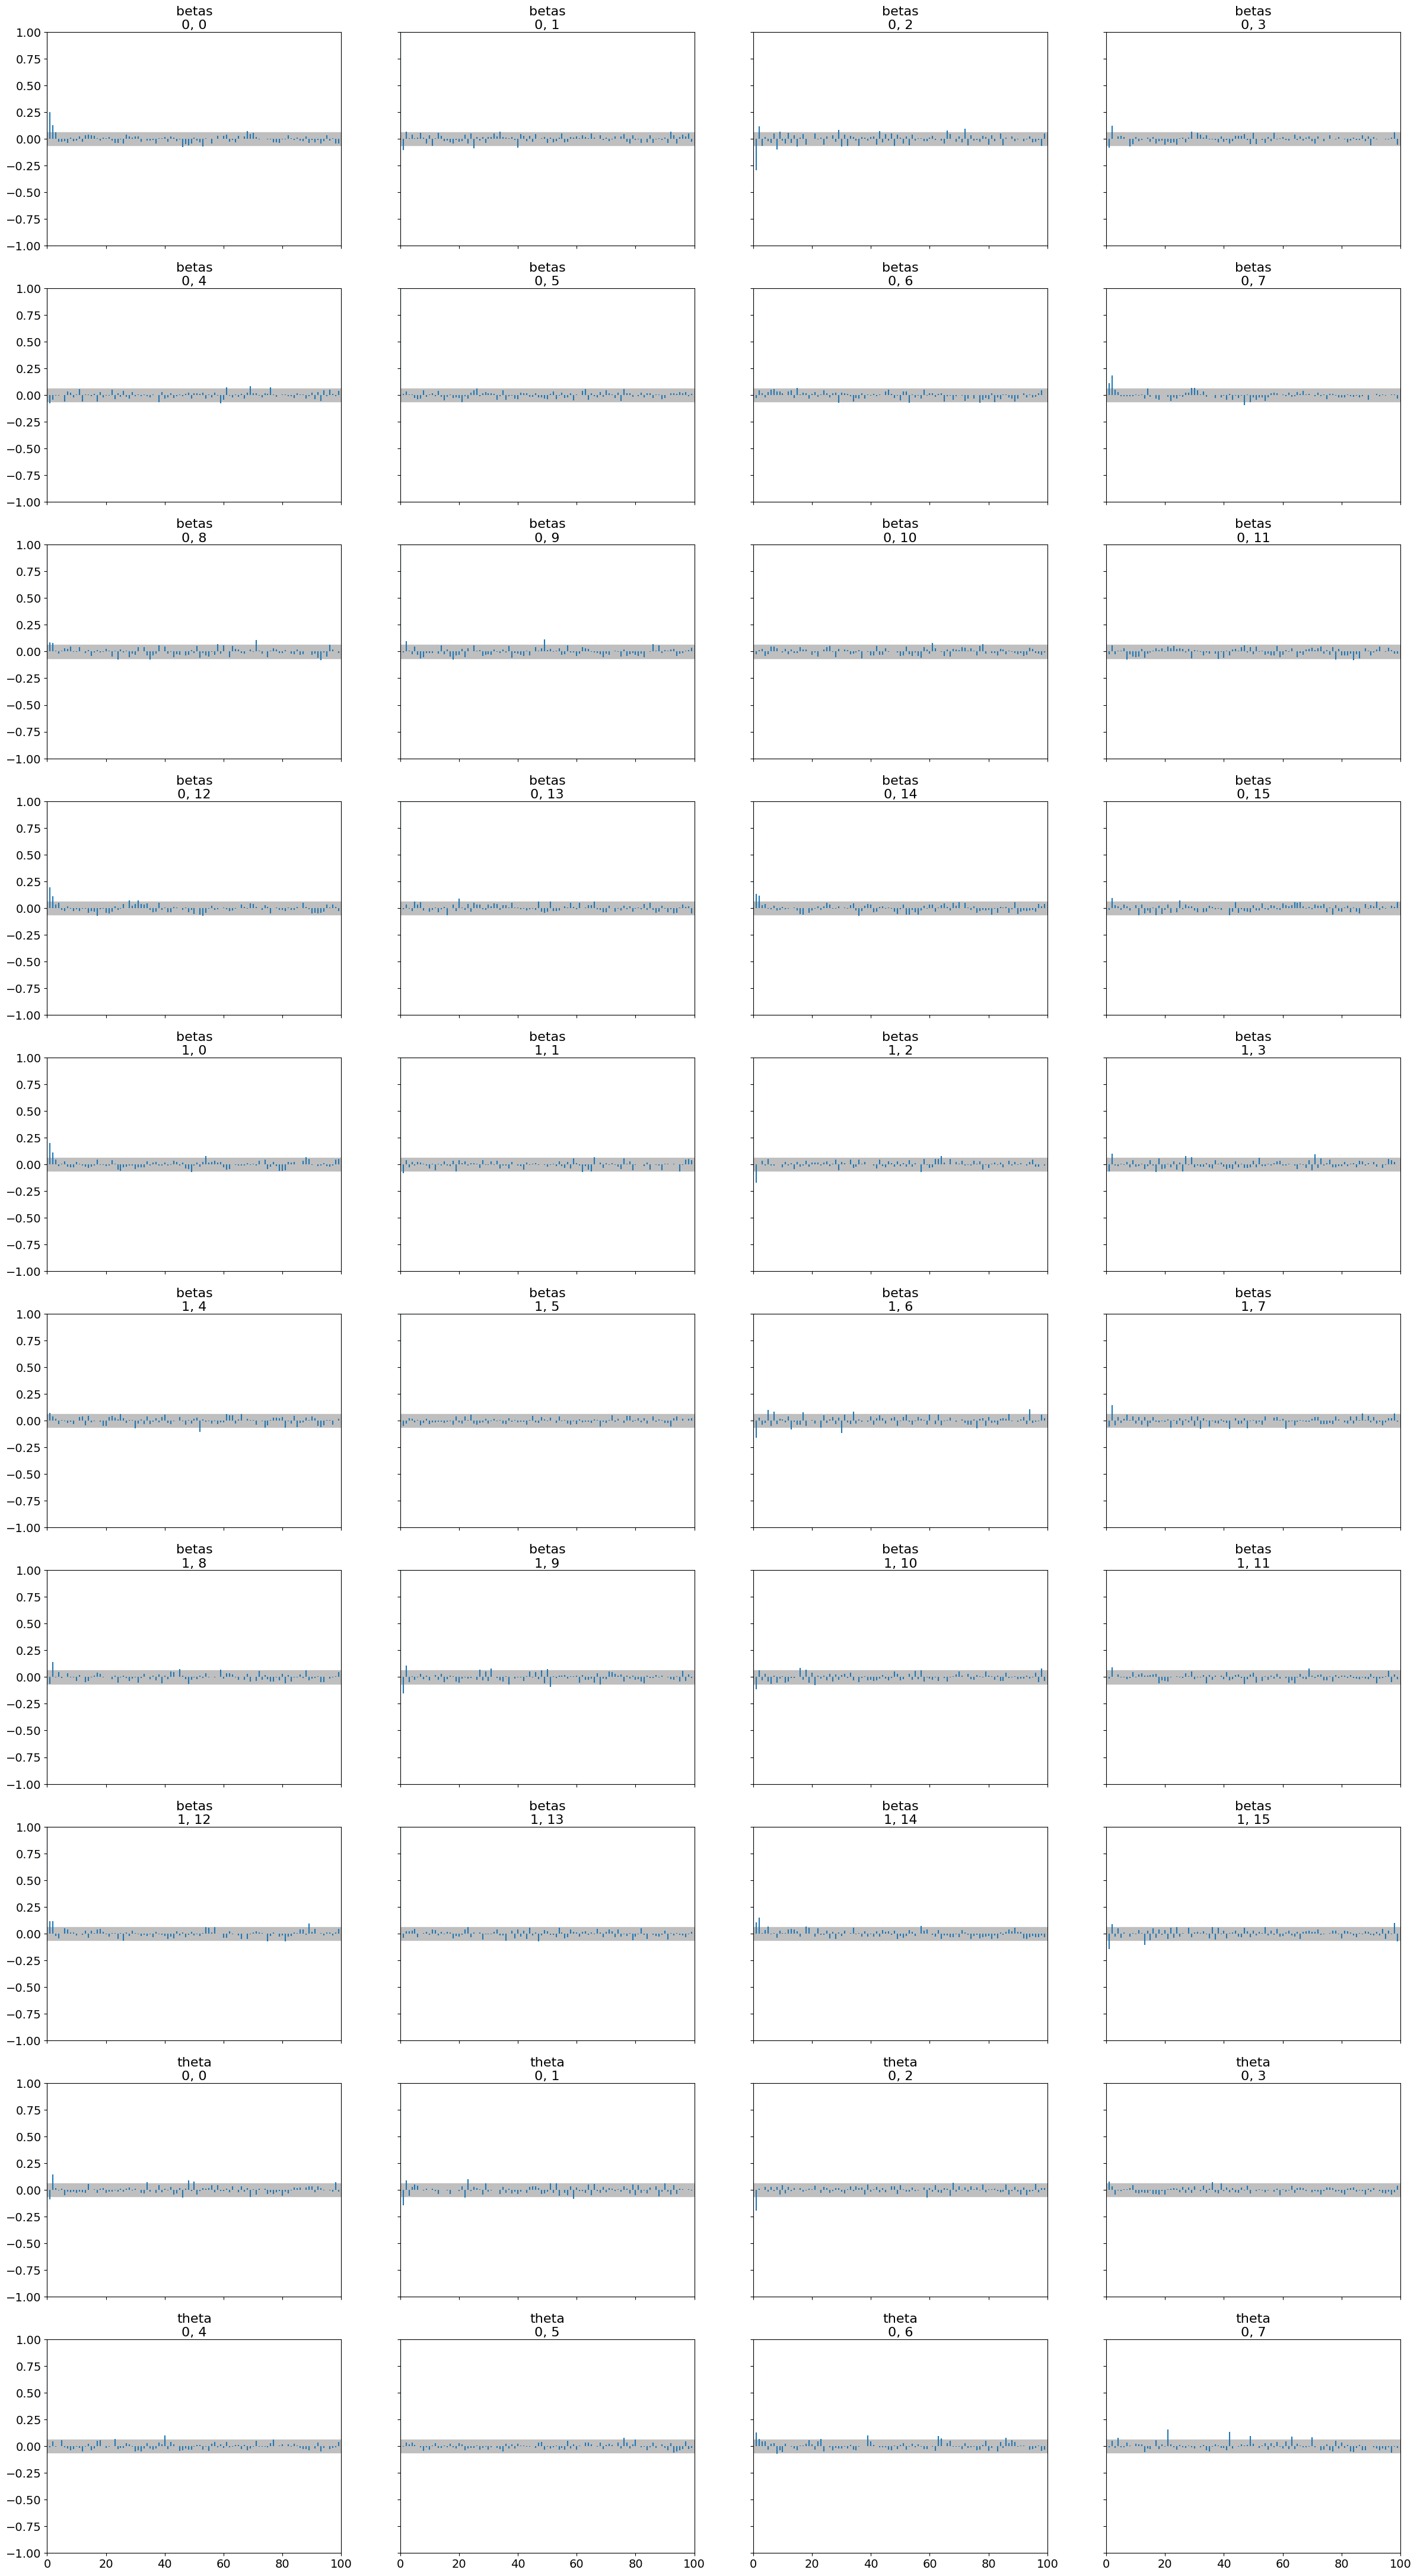

In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('/content/lung_cancer.csv')
# 2) Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# 3) Standardize numerical variables
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 4) Define features and target
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

# 5) Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Add an intercept to the features
X_train = np.clip(X_train, -5, 5)
y_train = (y_train > 0).astype(int)

# Add intercept to the features
X_train_np = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
n_features = X_train_np.shape[1]

with pm.Model() as logistic_model:
    # Adjust priors for stability
    betas = pm.StudentT('betas', nu=3, mu=0, sigma=1, shape=n_features)

    # Linear combination with clipping
    linear_combination = pm.math.dot(X_train_np, betas)
    linear_combination = pm.math.clip(linear_combination, -10, 10)

    # Logit transformation
    theta = pm.Deterministic('theta', pm.math.sigmoid(linear_combination))

    # Bernoulli likelihood
    y_obs = pm.Bernoulli('y_obs', p=theta, observed=y_train)

    # Sample with higher target_accept
    trace = pm.sample(1000, tune=1000, cores=2, target_accept=0.95, random_seed=42)

# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)

# MCMC diagnostics
az.plot_energy(trace)
az.plot_autocorr(trace)


### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Output()

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
L[0, 0]       0.831  0.038   0.764    0.901      0.001    0.000    3173.0   
L_packed[0]   0.831  0.038   0.764    0.901      0.001    0.000    3173.0   
betas[0, 0]  -0.032  0.051  -0.134    0.055      0.001    0.001    3225.0   
betas[1, 0]  -0.005  0.065  -0.125    0.123      0.001    0.001    3515.0   
betas[2, 0]   0.046  0.056  -0.061    0.152      0.001    0.001    3980.0   
betas[3, 0]   0.115  0.057   0.008    0.225      0.001    0.001    4185.0   
betas[4, 0]   0.192  0.072   0.066    0.333      0.001    0.001    2602.0   
betas[5, 0]   0.130  0.077  -0.009    0.279      0.002    0.001    2422.0   
betas[6, 0]   0.168  0.062   0.062    0.293      0.001    0.001    2920.0   
betas[7, 0]   0.164  0.058   0.060    0.275      0.001    0.001    3347.0   
betas[8, 0]   0.262  0.065   0.150    0.396      0.001    0.001    2861.0   
betas[9, 0]   0.204  0.058   0.103    0.322      0.001    0.001    3637.0   

array([[<Axes: title={'center': 'L\n0, 0, 0'}>,
        <Axes: title={'center': 'L\n1, 0, 0'}>,
        <Axes: title={'center': 'L_packed\n0, 0'}>,
        <Axes: title={'center': 'L_packed\n1, 0'}>],
       [<Axes: title={'center': 'betas\n0, 0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1, 0'}>,
        <Axes: title={'center': 'betas\n0, 2, 0'}>,
        <Axes: title={'center': 'betas\n0, 3, 0'}>],
       [<Axes: title={'center': 'betas\n0, 4, 0'}>,
        <Axes: title={'center': 'betas\n0, 5, 0'}>,
        <Axes: title={'center': 'betas\n0, 6, 0'}>,
        <Axes: title={'center': 'betas\n0, 7, 0'}>],
       [<Axes: title={'center': 'betas\n0, 8, 0'}>,
        <Axes: title={'center': 'betas\n0, 9, 0'}>,
        <Axes: title={'center': 'betas\n0, 10, 0'}>,
        <Axes: title={'center': 'betas\n0, 11, 0'}>],
       [<Axes: title={'center': 'betas\n0, 12, 0'}>,
        <Axes: title={'center': 'betas\n0, 13, 0'}>,
        <Axes: title={'center': 'betas\n0, 14, 0'}>,
        <Ax

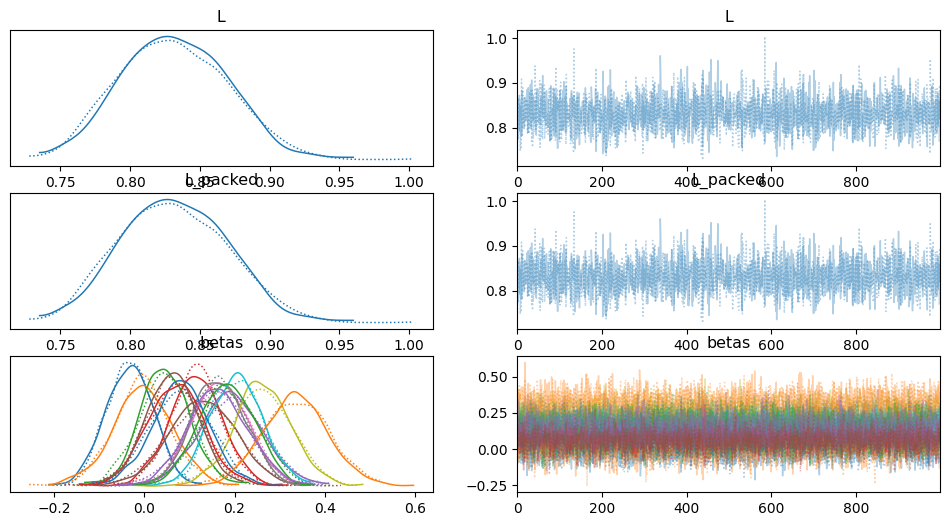

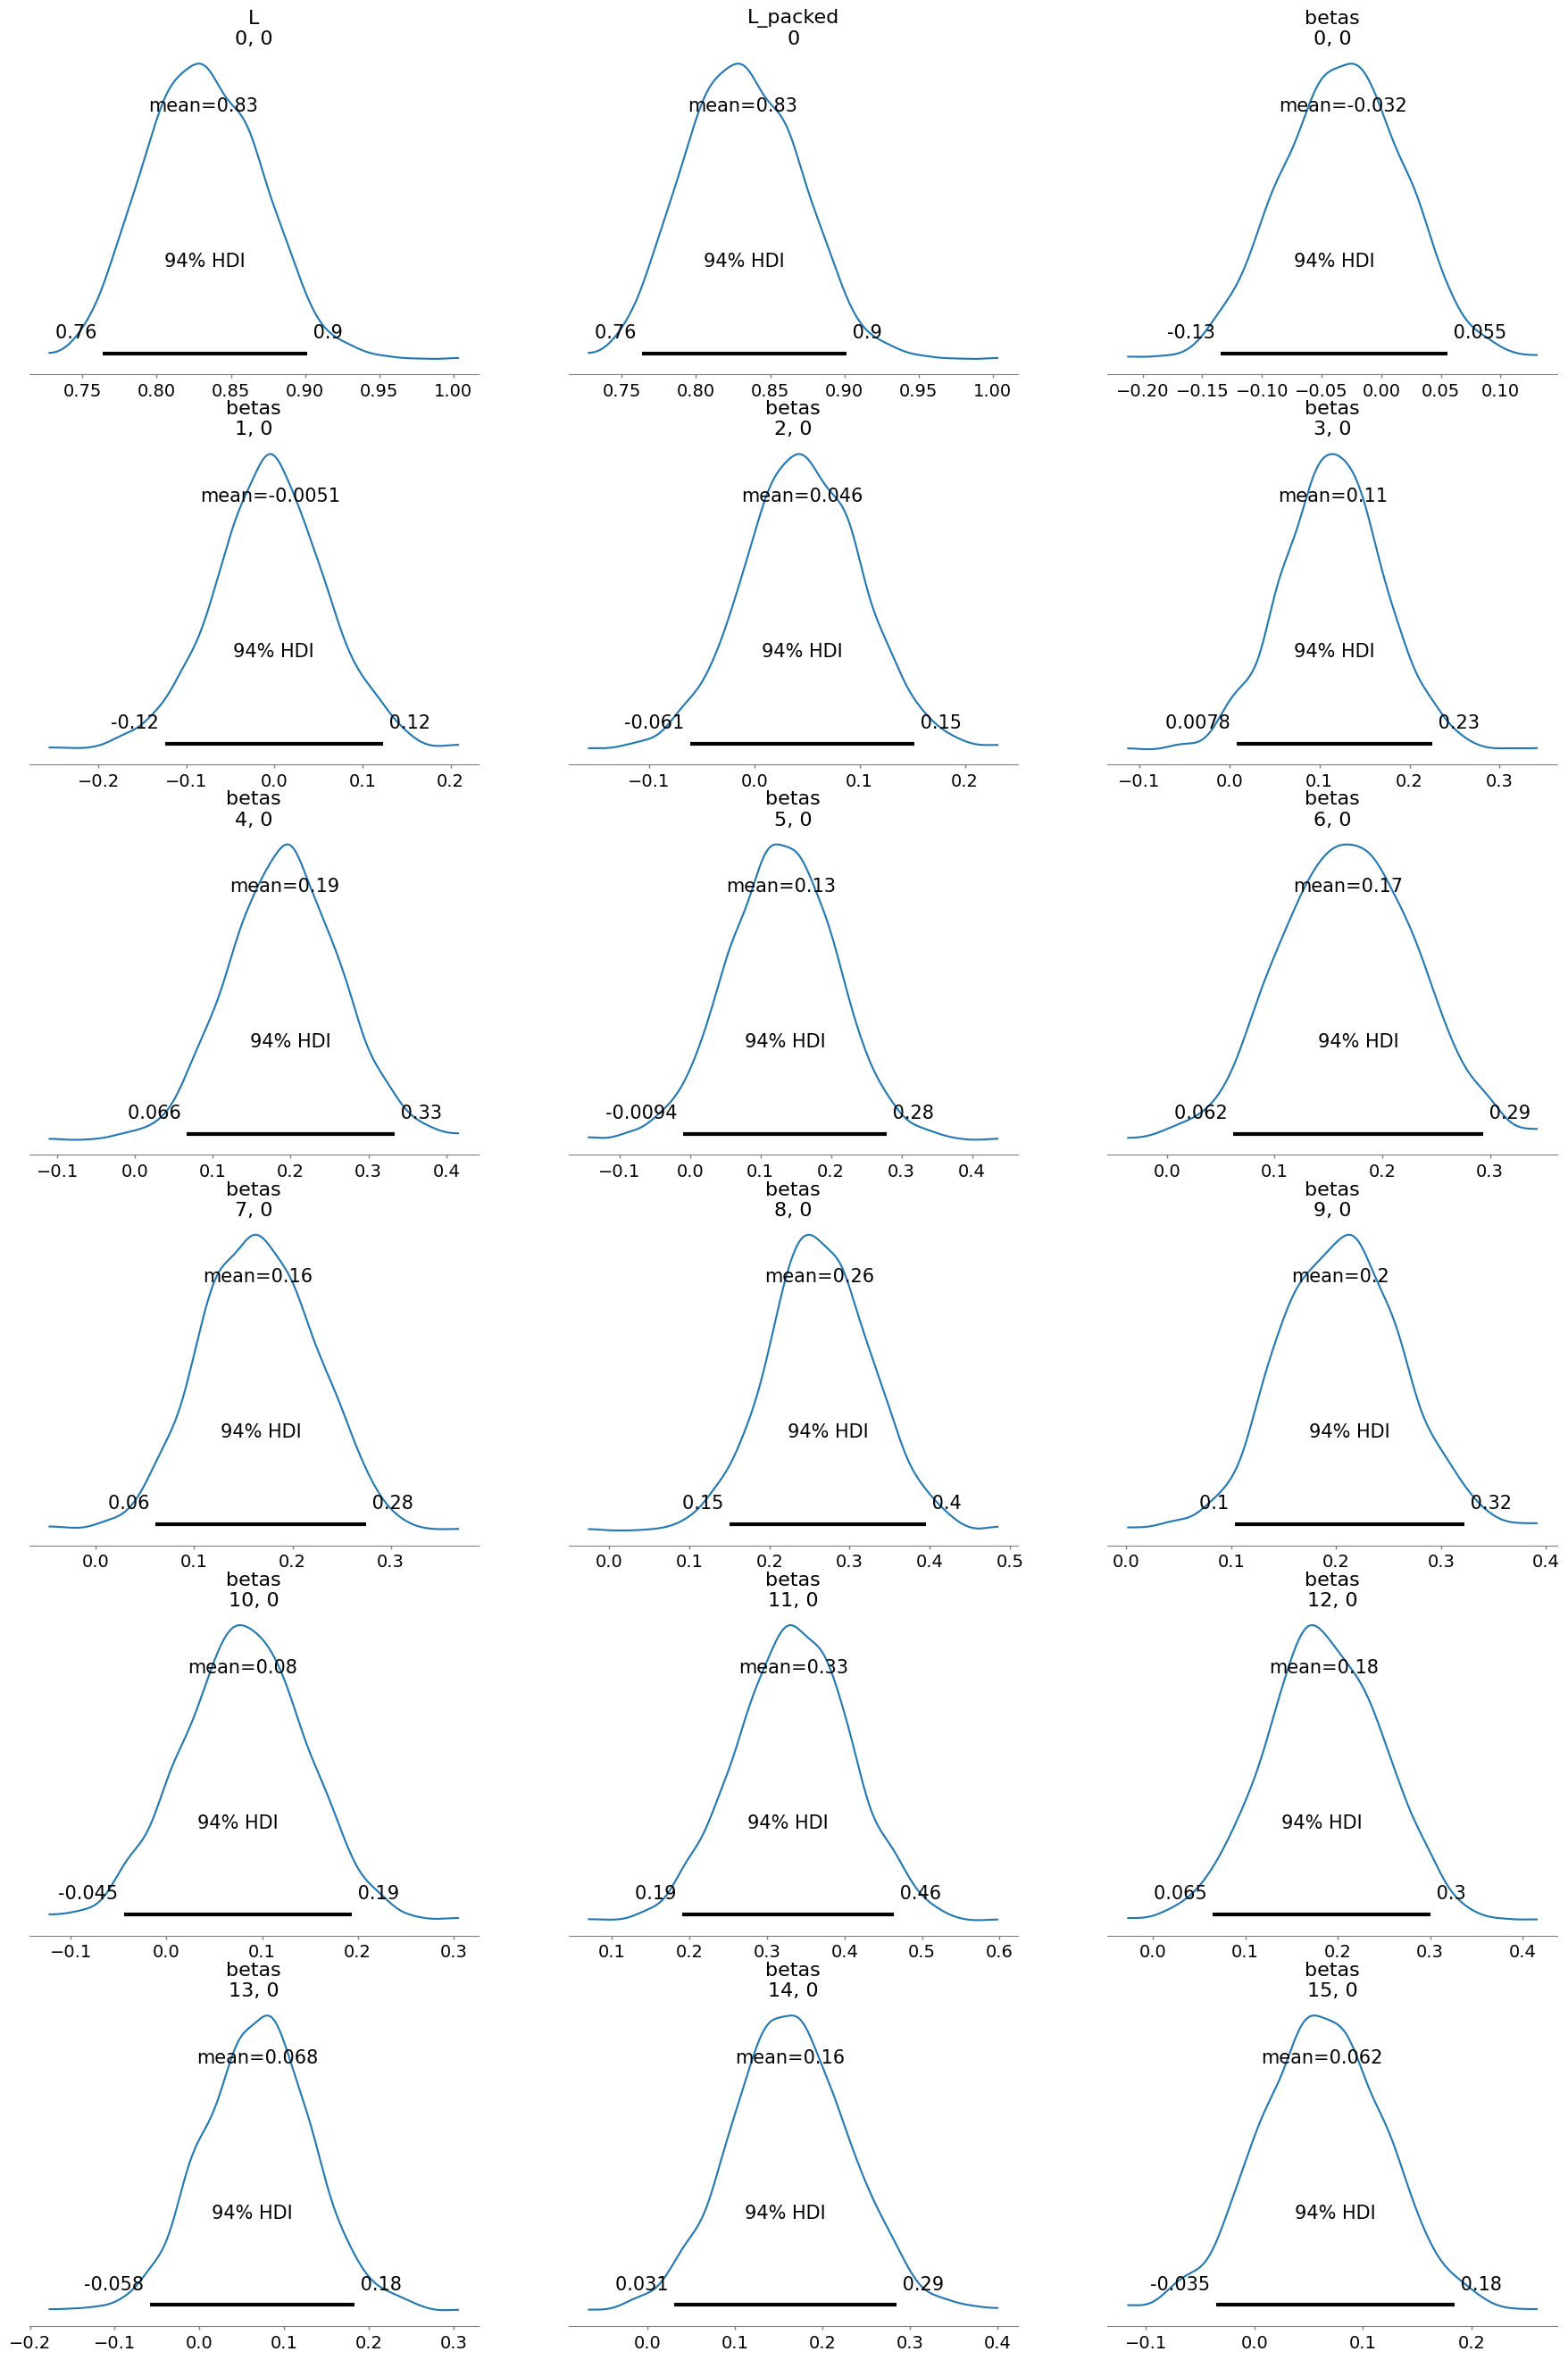

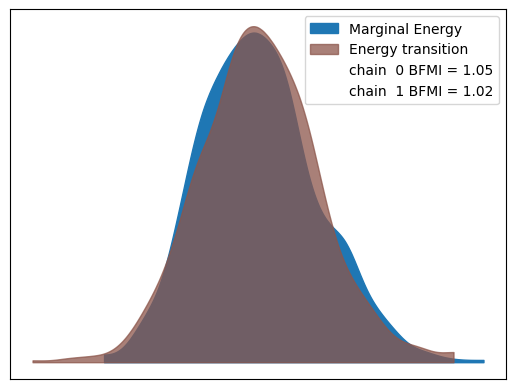

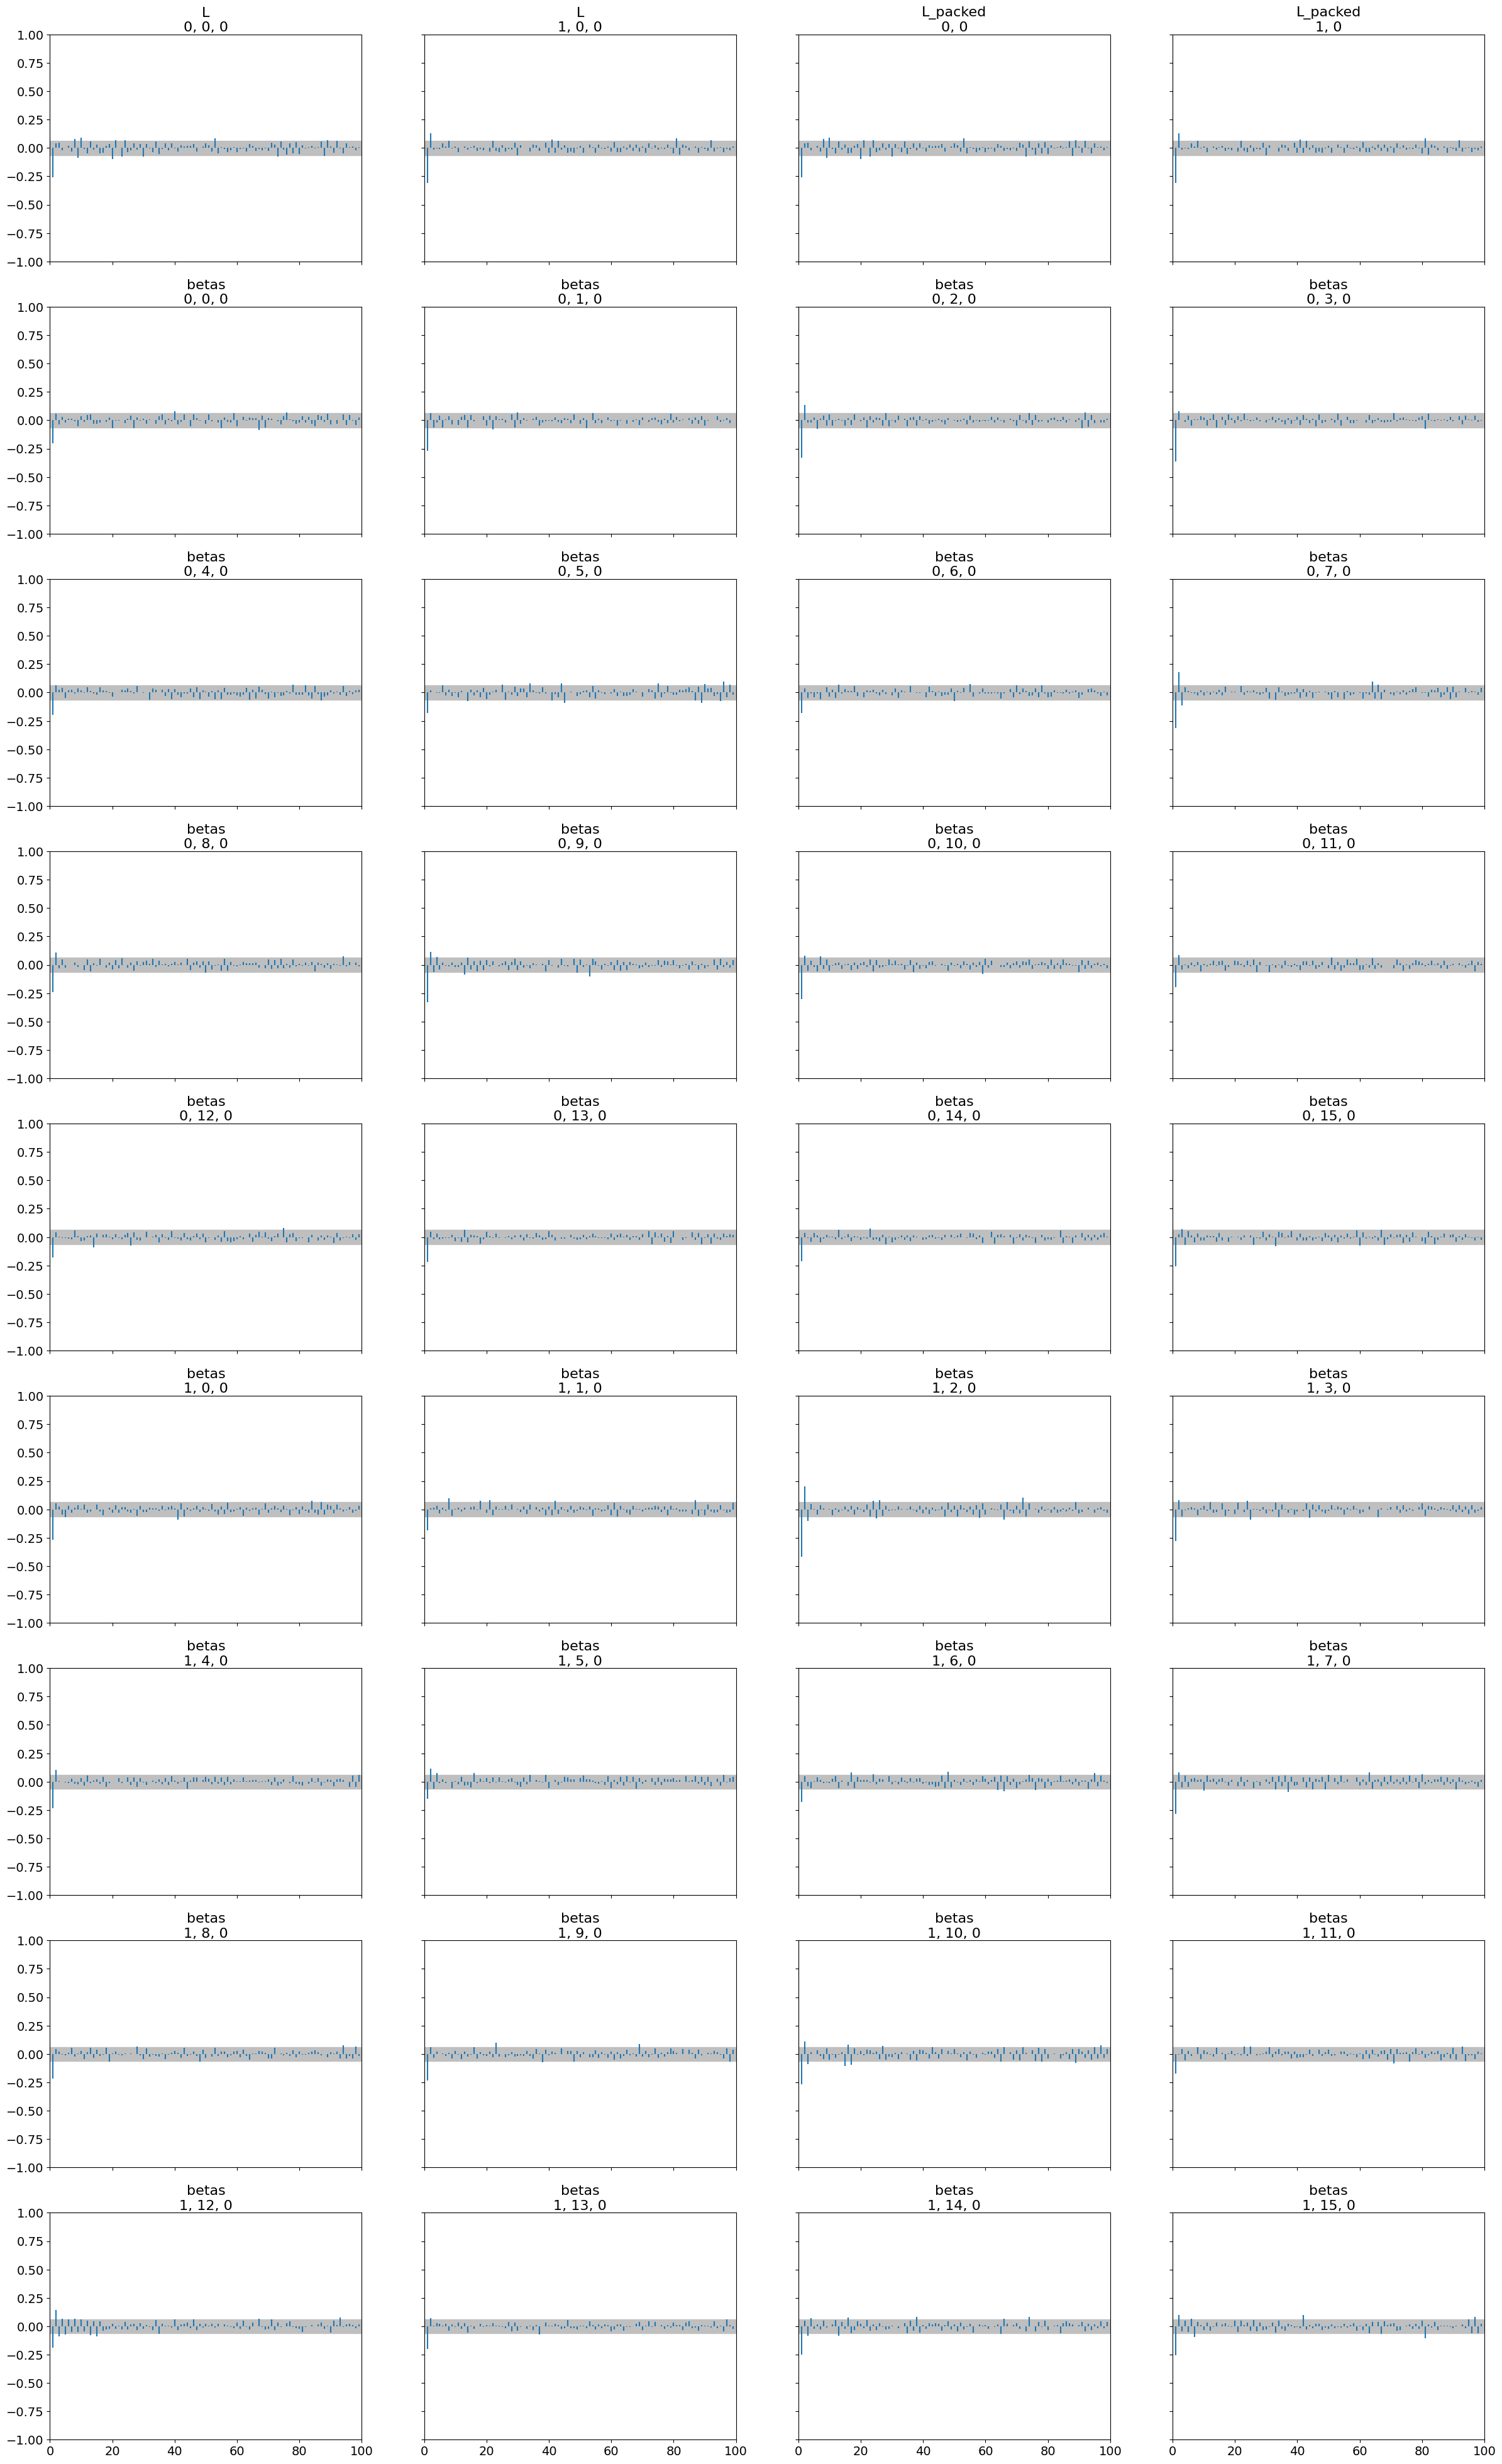

In [19]:
# Load the dataset
data = pd.read_csv('/content/lung_cancer.csv')

# Handle missing values if any
data = data.dropna()

# Convert categorical variables to numerical (GENDER: M -> 1, F -> 0)
data["GENDER"] = data["GENDER"].map({"M": 1, "F": 0})

# Convert target variable (LUNG_CANCER: YES -> 1, NO -> 0)
data["LUNG_CANCER"] = data["LUNG_CANCER"].map({"YES": 1, "NO": 0})

# Standardize numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data = pd.DataFrame(scaled_data, columns=data.columns)

# Define features and targets
X = data.drop(columns=["LUNG_CANCER"])  # Features
y = data[["LUNG_CANCER"]]  # Target (keeping it as a DataFrame for multivariate consistency)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)  # Ensure y_train is 2D

# Add an intercept to the features
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
n_samples, n_features = X_train.shape
n_targets = y_train.shape[1]

# Bayesian Multivariate Regression using PyMC
with pm.Model() as multivariate_regression_model:
    # Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(n_features, n_targets))

    # Expected value
    # Expected value
    mu = pm.math.dot(X_train, betas).reshape((X_train.shape[0], 1))  # Ensure 2D shape

    # Cholesky decomposition for covariance matrix
    L_packed = pm.LKJCholeskyCov("L_packed", n=n_targets, eta=2.0, sd_dist=pm.Exponential.dist(1.0), compute_corr=False)

# Extract Cholesky factor
    L = pm.Deterministic("L", pm.expand_packed_triangular(n_targets, L_packed))

# Likelihood
    y_obs = pm.MvNormal("y_obs", mu=mu, chol=L, observed=y_train)

    # MCMC Sampling
    trace = pm.sample(1000, tune=1000, cores=2, random_seed=42)

# Downsample to 100 samples and 5 predictors
X_downsampled = X_train[:100, :5]
y_downsampled = y_train[:100]

# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)

# MCMC diagnostics
az.plot_energy(trace)
az.plot_autocorr(trace)


In [ ]:
n,m,p = 100,10,5
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
a_cov = stats.invwishart(df=m+2, scale=np.eye(m)).rvs()
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cov).rvs(size=n)

with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=m),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    y = pm.MvNormal('y', mu=X@betas, chol=L,  #cov=Sigma
                    observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


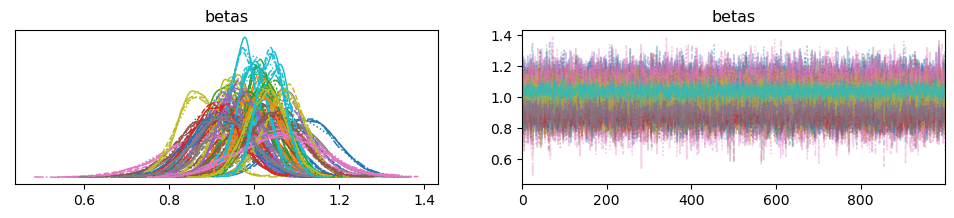

In [ ]:
import arviz as az

az.plot_trace(idata,var_names='betas');

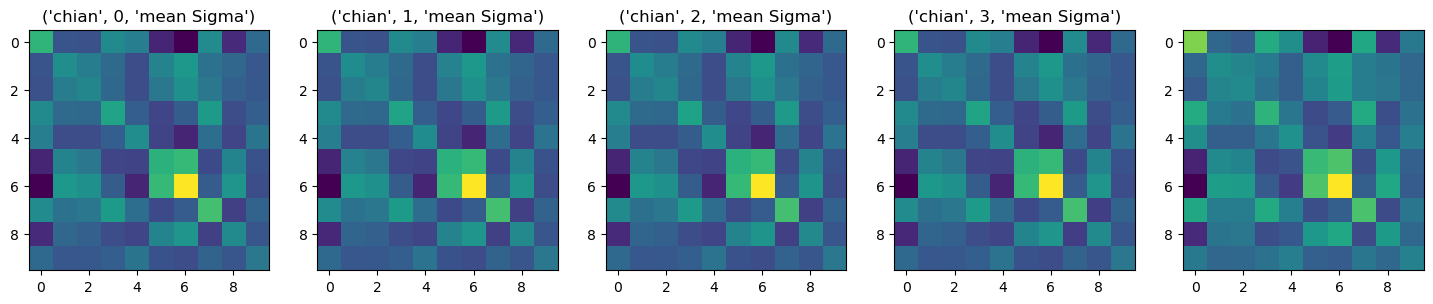

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [ ]:
# =========================
# 1. Load & Preprocess Data
# =========================

# Load the dataset
data = pd.read_csv('/content/lung_cancer.csv')

# Encode categorical variables
data["GENDER"] = data["GENDER"].map({"M": 1, "F": 0})
data["LUNG_CANCER"] = data["LUNG_CANCER"].map({"YES": 1, "NO": 0})

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features (X) and target (Y)
X = data.drop(columns=["LUNG_CANCER"])
y = data[["LUNG_CANCER"]]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Add an intercept term
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
n_samples, n_features = X_train.shape
n_targets = y_train.shape[1]

# Ensure no NaN/Inf values in the data
X_train = np.nan_to_num(X_train, nan=0.0, posinf=1.0, neginf=-1.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=1.0, neginf=-1.0)

# =========================
# 2. Bayesian Multivariate Classification Model
# =========================

with pm.Model() as multivariate_classification_model:
    # Priors for coefficients
    betas = pm.Normal("betas", mu=0, sigma=0.01, shape=(n_features, n_targets))

    # Linear combination
    linear_combination = pm.math.dot(X_train, betas)

    # Define Cholesky decomposition for covariance matrix
    L_packed, _, _ = pm.LKJCholeskyCov("L_packed", n=n_targets, eta=2.0, sd_dist=pm.Exponential.dist(1.0))
    L = pm.expand_packed_triangular(n_targets, L_packed)

    # Multivariate Normal with correct shape
    z = pm.MvNormal("z", mu=linear_combination, chol=L, shape=(X_train.shape[0], n_targets))

    # Likelihood with probit link
    theta = pm.Deterministic("theta", pm.math.invprobit(z))
    y_obs = pm.Bernoulli("y_obs", p=theta, observed=y_train)

    # =========================
    # 3. Run MCMC Sampling
    # =========================

    trace = pm.sample(
        1000, tune=2000, target_accept=0.99, init="jitter+adapt_diag",
        cores=2, random_seed=42, discard_tuned_samples=False
    )

# =========================
# 4. MCMC Diagnostics and Results
# =========================

# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)

# MCMC diagnostics
az.plot_energy(trace)
az.plot_autocorr(trace)

# =========================
# 5. Downsampling (Optional)
# =========================

# Downsample to 100 samples and 5 predictors
X_downsampled = X_train[:100, :5]
y_downsampled = y_train[:100]

# The model should be updated accordingly if using the downsampled data
# ...


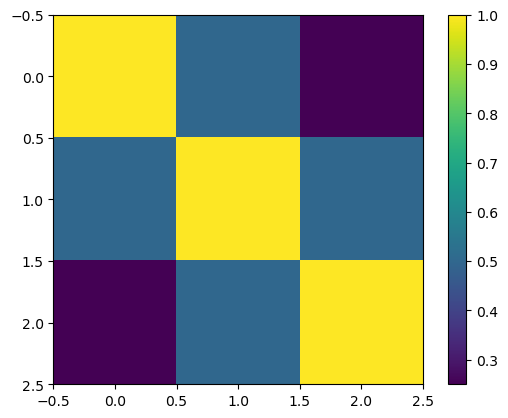

In [ ]:
n,m,p = 100,3,3
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
#a_cov = stats.invwishart(df=m+2, scale=np.ones(m)).rvs()
a_cor = (np.ones((p,p))+np.diag((1,1,1)))/2
a_cor[0,-1] = 0.25
a_cor[-1,0] = 0.25
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar()

# Make outcome binary
x = x>0

In [ ]:
with pm.Model() as GLM:

    L,R,std = pm.LKJCholeskyCov("R", n=m, eta=2.0,
                                sd_dist=pm.Exponential.dist(1.0, shape=m),
                                compute_corr=True)
    #L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    #Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    z = pm.MvNormal('z', mu=X@betas, cov=R) #cov=Sigma
    # the probit is the inverse cdf of a standard normal
    # the inverse probit is the cdf of a standard normal
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)
    # Integrating out z would give:
    #y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize.


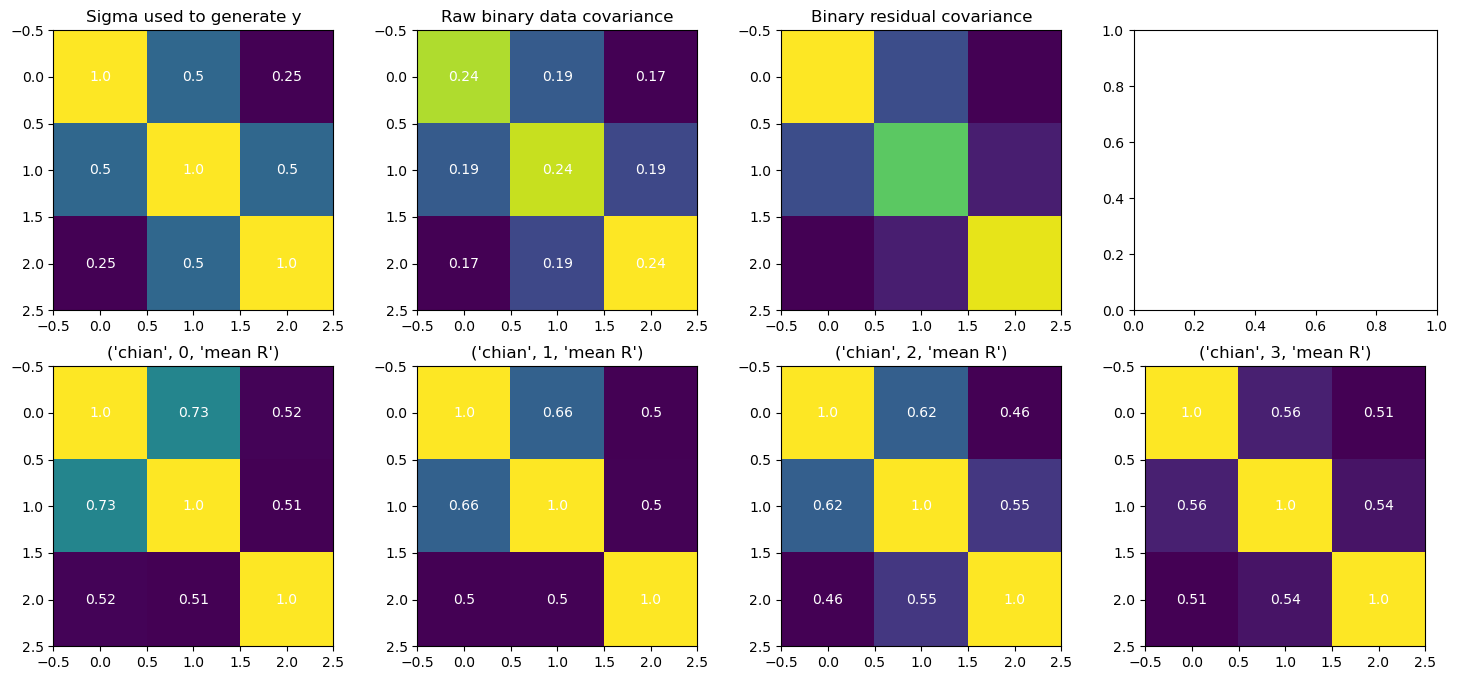

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
ax[0,0].imshow(a_cor)
ax[0,0].set_title(("Sigma used to generate y"))
for i in range(3):
    for j in range(3):
        ax[0,0].text(i,j,str(round(a_cor[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,1].imshow(np.cov(x.T))
ax[0,1].set_title(("Raw binary data covariance"))
for i in range(3):
    for j in range(3):
        ax[0,1].text(i,j,str(round(np.cov(x.T)[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,2].imshow(np.cov((x-stats.norm().cdf(X@beta_)).T))
ax[0,2].set_title(("Binary residual covariance"))
for chain in range(4):
    ax[1,chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(3):
        for j in range(3):
            ax[1,chain].text(i,j,str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j,i],2)),
                             c='w', ha='center', va='center')
    ax[1,chain].set_title(("chian",chain,"mean R"))

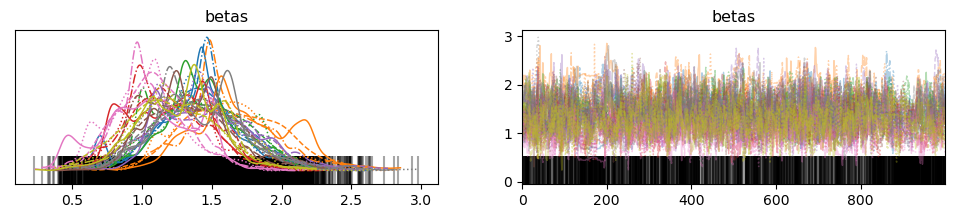

In [ ]:
az.plot_trace(idata,var_names='betas');